In [2]:
from PIL import Image
import numpy
import random
import math

apple = Image.open("banner.png")
array = numpy.array(apple)


for i in range(len(array)):
    for j in range(len(array[i])):
        if array[i][j][0] > 150:
            array[i][j] = [0,min(255,2 * array[i][j][1]),min(255,2 * array[i][j][2]), 255]
        array[i][j][0] += random.uniform(-0.1, 0.1)
        array[i][j][1] += random.uniform(-0.1, 0.1)
        array[i][j][2] += random.uniform(-0.1, 0.1)
        array[i][j][3] += random.uniform(-0.1, 0.1)

apple2 = Image.fromarray(array)
apple2.show()

FileNotFoundError: [Errno 2] No such file or directory: 'banner.png'

[ 60.  60.  60.  60.  60.  60.  59.  59.  59.  59.  59.  59.  59.  58.
  58.  58.  58.  58.  58.  57.  57.  57.  57.  57.  56.  56.  56.  56.
  56.  56.  56.  55.  55.  55.  55.  55.  55.  54.  54.  54.  54.  54.
  54.  54.  53.  53.  53.  53.  53.  53.  52.  52.  52.  52.  52.  52.
  51.  51.  51.  51.  51.  51.  50.  50.  50.  50.  50.  50.  49.  49.
  49.  49.  49.  48.  48.  48.  48.  48.  48.  48.  48.  47.  47.  47.
  47.  47.  47.  46.  46.  46.  46.  46.  46.  46.  45.  45.  45.  45.
  45.  45.  44.  44.  44.  44.  44.  44.  44.  43.  43.  43.  43.  43.
  43.  43.  42.  42.  42.  42.  42.  42.  41.  41.  41.  41.  41.  41.
  41.  41.  40.  40.  40.  40.  40.  40.  40.  39.  39.  39.  39.  38.
  37.  11.  11.  11.  11.  11.  11.  11.  11.  11.  11.  11.  11.  11.
  11.  11.  11.  11.  11.  11.  11.  11.  11.  11.  11.  11.  11.  11.
  11.  11.  11.  11.  11.  11.  11.  11.  11.  11.  11.  11.  11.  11.
  11.  11.  11.  11.  11.  11.  11.  11.  11.  11.  11.  11.  11.  11.
  11. 

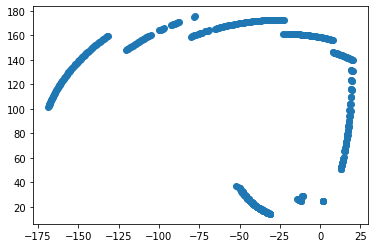

In [2]:
from PIL import Image
import numpy
from Controller import converter
import cv2

from matplotlib import pyplot

leftImg, rightImg = numpy.split(numpy.array(Image.open("img12.png")), 2, axis=1)

def show(img):
    Image.fromarray(img).show()

# show(leftImg)

# filteredLeftImg = converter.filter(leftImg)
# leftEdgesImage, gLeftIn, rLeftIn = cv2.split(filteredLeftImg)
InrLeftIn, gLeftIn, leftEdgesIn, leftBlurred = converter.filter(leftImg)
# show(leftBlurredIn)
show(leftEdgesIn)

# filteredRightImg = converter.filter(rightImg)
# rightEdgesImage, gRightIn, rRightIn = cv2.split(filteredRightImg)
rRightIn, gRightIn, rightEdgesIn, rightBlurredIn = converter.filter(rightImg)

distances, croppedLeft, rawHeightsLeft = converter.getDistances(leftBlurredIn, leftEdgesIn, rightBlurredIn, rightEdgesIn)

# for i in rawHeightsLeft:
#     croppedLeft[i][rawHeightsLeft[i]] = 125
# show(croppedLeft)
# image = []

print(rawHeightsLeft)

# # print(heights)
# # print(left)
# print(distances)
x = []
y = []
for i in distances:
    # print(i)
    # if i[2] < 200:
    x.append(i[0])
    y.append(i[1])
# pyplot.xlim(-150, 50)
# pyplot.ylim(0, 200)

pyplot.scatter(x, y)
# for i in range(len(rawHeightsLeft)):
#     print(rawHeightsLeft[i])
#     print(distances[i])

# for i in distances:
#     image.append([i[2], i[2], i[2]])
# show(numpy.array(image))
# show(numpy.concatenate(([distances], [distances], [distances]), axis=0))
rBlobs, gBlobs = converter.getBlobs(rLeftIn, gLeftIn, rRightIn, gRightIn)

print(gBlobs)

outerWallLandmarks, innerWallLandmarks, rBlobLandmarks, gBlobLandmarks = converter.getLandmarks(distances, rBlobs, gBlobs)

# for landmark in outerWallLandmarks:
#     if landmark[2] < 30:
#         print(landmark)
print(outerWallLandmarks, innerWallLandmarks, rBlobLandmarks, gBlobLandmarks)

print(converter.focalLength, converter.focalLength)

In [ ]:
import math

horizontalFov = 155
verticalFov = 115
imageWidth = 272
imageHeight = 154
focalLength = ((imageHeight / 2) / math.tan(math.pi * (verticalFov / 2) / 180))
wallHeight = 10
centerOffset = 10
dist = wallHeight * math.sqrt(focalLength**2 + (imageWidth / 2 - 29)**2) / 36
# return (dir * (3 + a[1] * dist), (10 + a[2] * dist), dist)

print(focalLength)
dist